In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.shape

(730, 16)

In [4]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#checking for null values in dataset

count=bikes.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [6]:
#checking for datatypes of columns
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#from the given data we can see that instant is an index column so we drop it
bikes.drop(['instant'],axis=1,inplace=True)

In [8]:
bikes.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
#we can see column dteday and yr month are having same data so we can drop dteday to avoid confusion

bikes.drop(['dteday'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
bikes.drop(['casual','registered'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bikes['season'] = bikes['season'].map({1:'spring',2:'summer', 3:'fall', 4:'winter'})
bikes['mnth'] = bikes['mnth'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikes['weekday'] = bikes['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bikes['weathersit'] = bikes['weathersit'].map({1:'Clear-Partlycloudy',2:'Mist-Cloudy',3:'LightSnow-lightRain-Thunderstorm',4:'HeavyRain-IcePallets-Thunderstorm'})

In [12]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear-Partlycloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear-Partlycloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear-Partlycloudy,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#changing datatypes of numerical columns to appropriate types

bikes[['temp','atemp','hum','windspeed','cnt']]=bikes[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [14]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


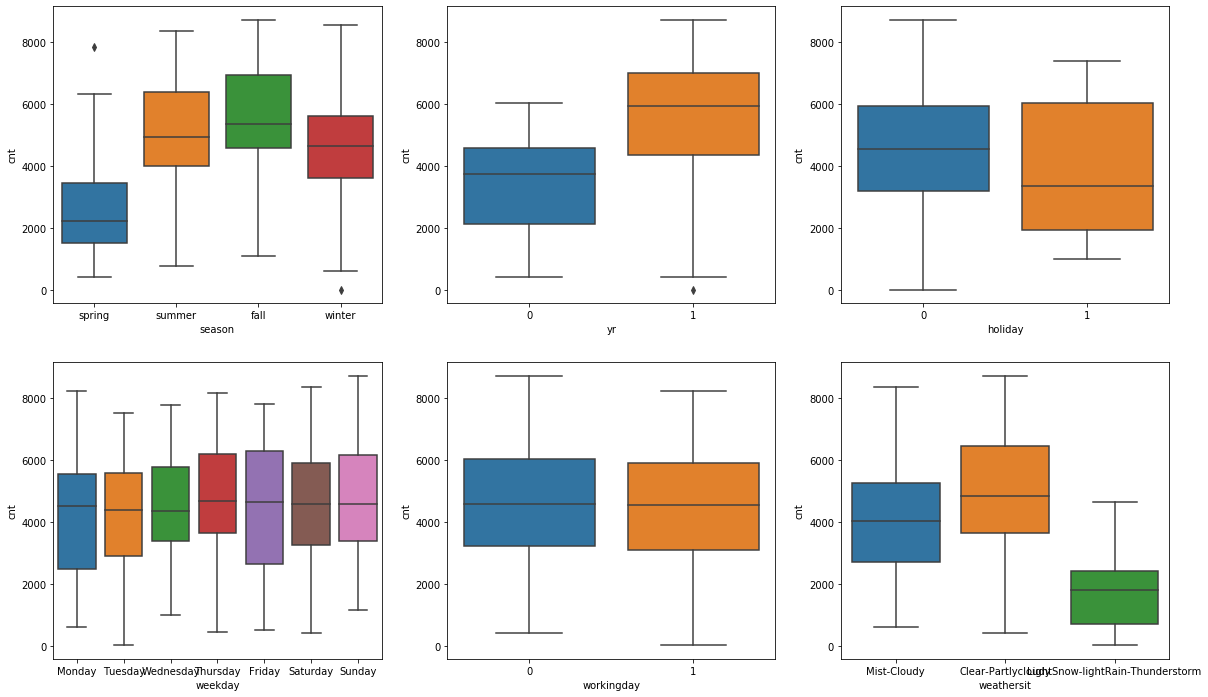

In [15]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(20, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bikes)
    plt.show()

cat_var =['season','yr','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'cnt')

In [16]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the bikeSharing

bikes = dummies('season',bikes)
bikes = dummies('mnth',bikes)
bikes = dummies('weekday',bikes)
bikes = dummies('weathersit',bikes)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
df_train.shape

(510, 30)

In [19]:
df_test.shape

(219, 30)

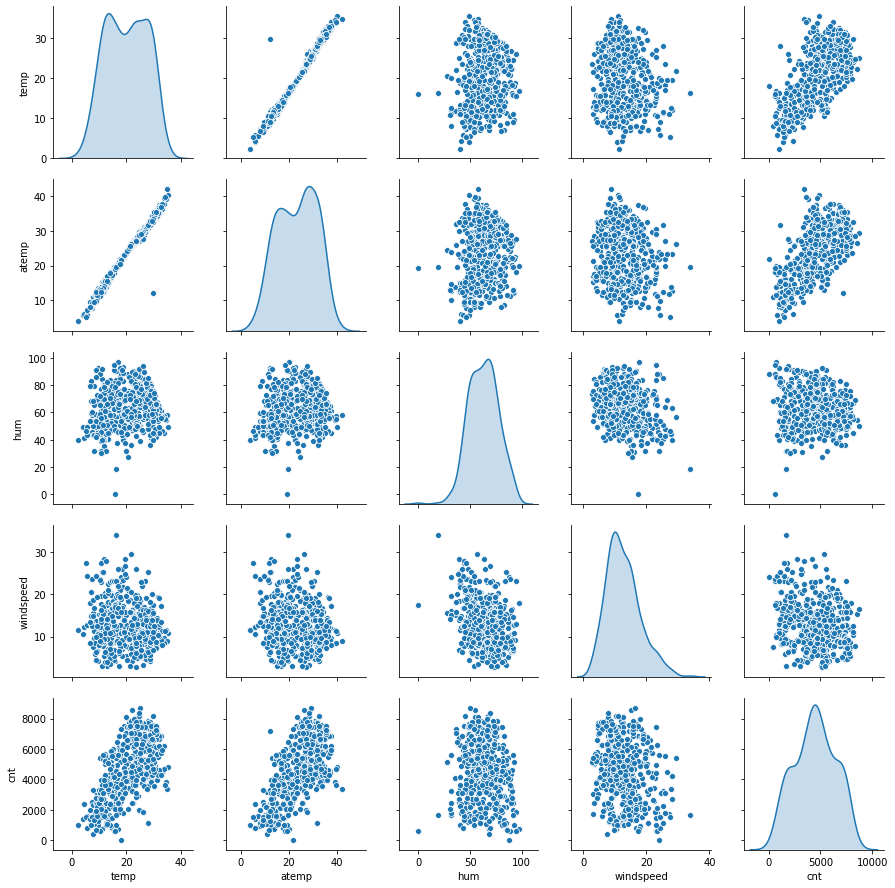

In [20]:
# we can see patterns between variables 
sns.pairplot(df_train[[ 'temp','atemp', 'hum', 'windspeed','cnt']],diag_kind='kde')
plt.show()

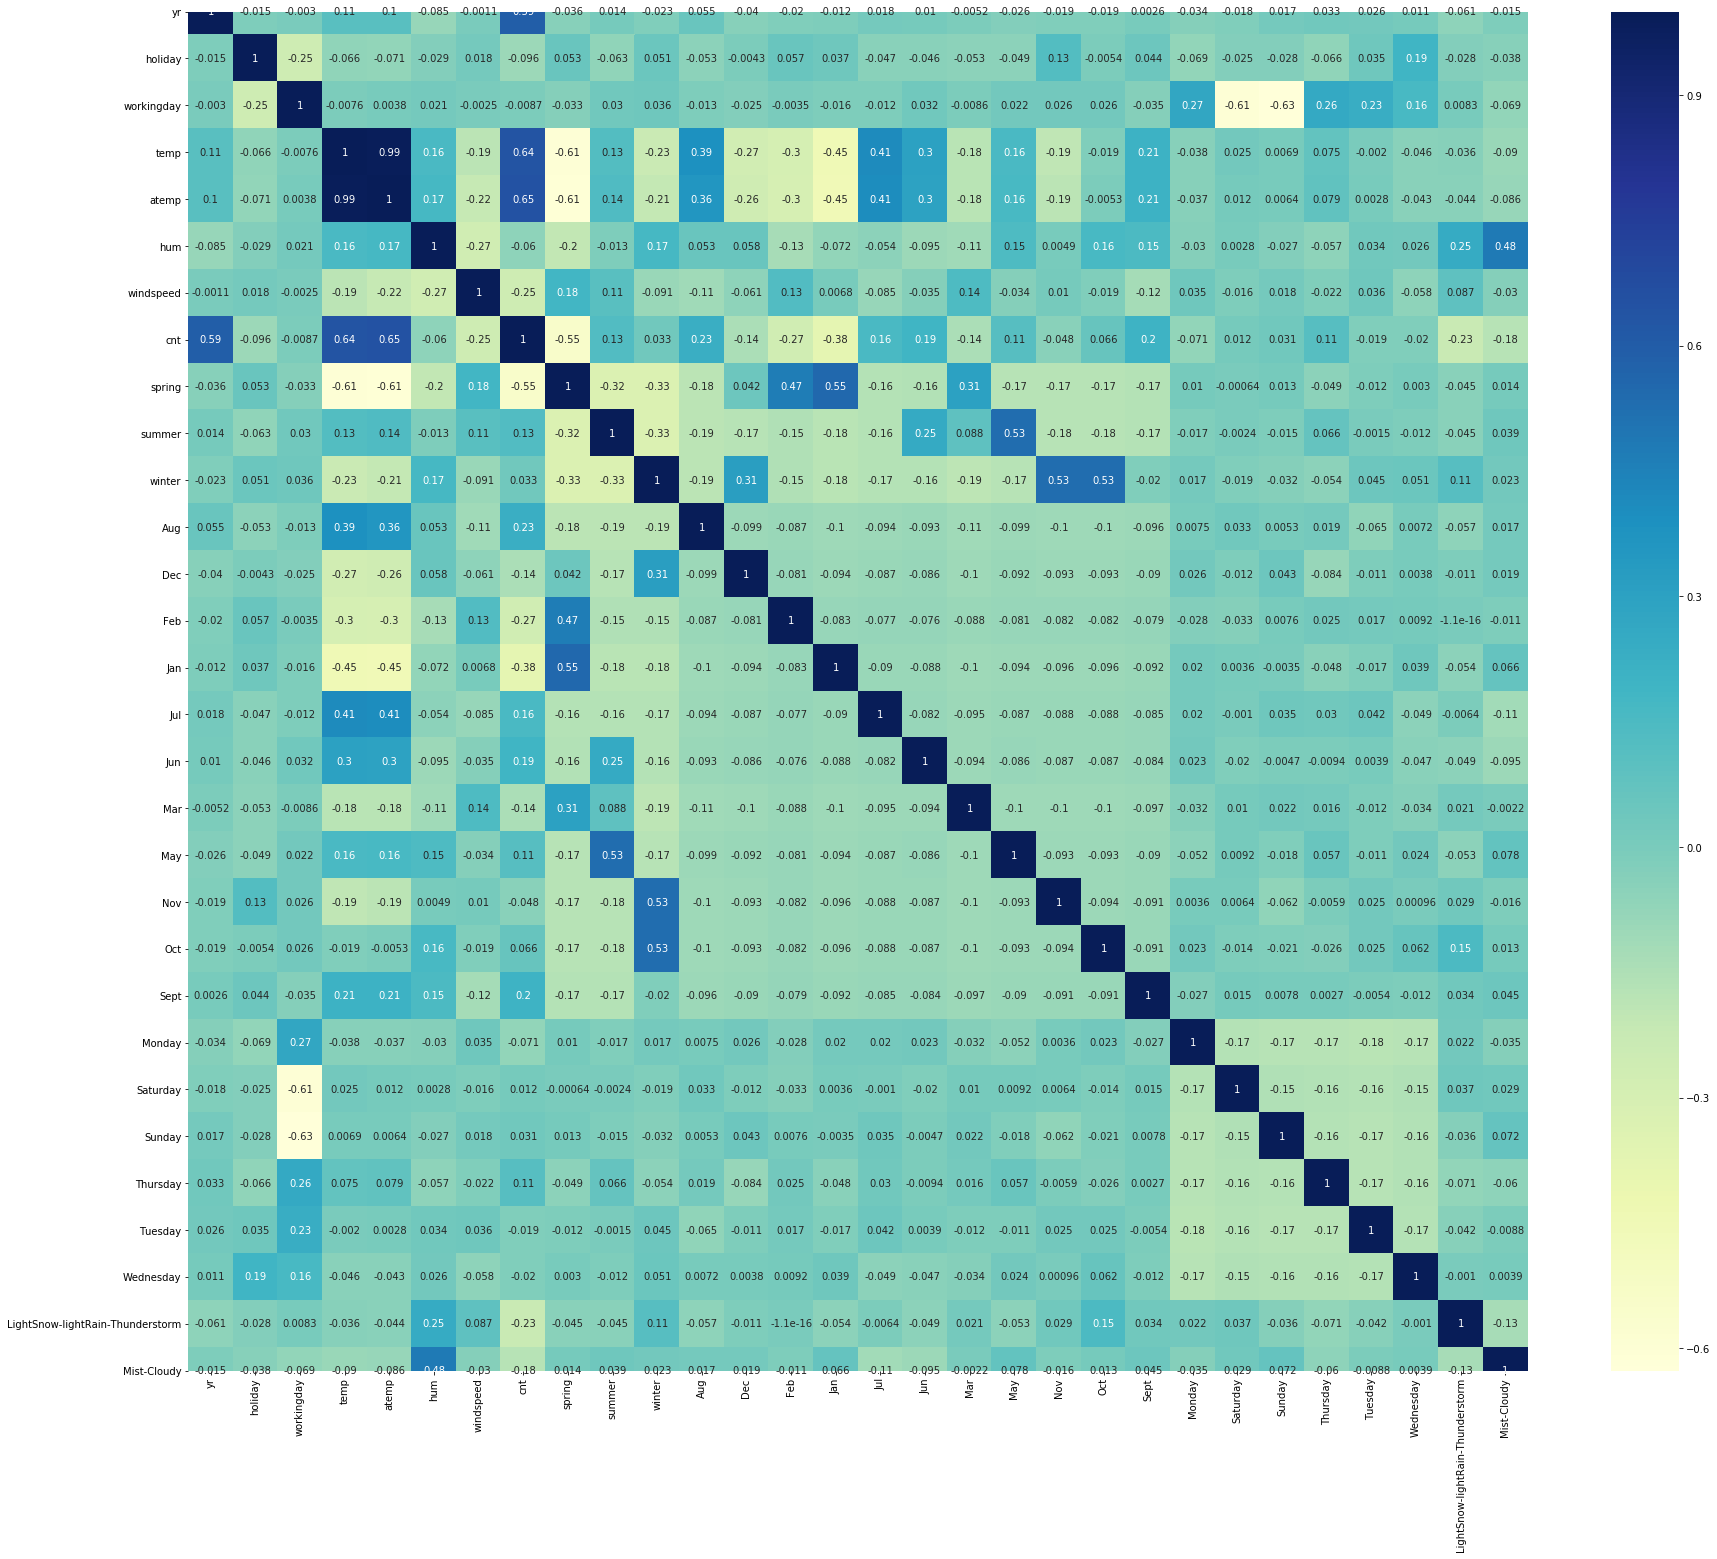

In [21]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
#importing libs for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 18)
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 12),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sept', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', False, 2),
 ('Thursday', False, 10),
 ('Tuesday', False, 5),
 ('Wednesday', False, 8),
 ('LightSnow-lightRain-Thunderstorm', True, 1),
 ('Mist-Cloudy', True, 1)]

In [29]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Dec,Feb,Jan,Jul,Nov,Sept,Saturday,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,1


# MODEL 1

In [30]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.88e-187
Time:                        14:41:18   Log-Likelihood:                 518.60
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     491   BIC:                            -918.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [31]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.98
7,spring,5.69
4,temp,4.73
9,winter,3.84
8,summer,2.81
12,Jan,2.37
5,hum,1.94
11,Feb,1.86
3,workingday,1.83
14,Nov,1.80


In [32]:
#some features are statistically insignificant, among them, we will drop 'Saturday'

In [33]:
X_train_sm = X_train_sm.drop(['Saturday'],axis =1)

In [34]:
X_train_sm

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Dec,Feb,Jan,Jul,Nov,Sept,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,0,0,0,1
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0
350,1.0,0,0,1,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,0,1


# Model 2

In [35]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.60e-188
Time:                        14:45:46   Log-Likelihood:                 518.50
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [36]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,87.78
7,spring,5.69
4,temp,4.73
9,winter,3.84
8,summer,2.81
12,Jan,2.37
5,hum,1.94
11,Feb,1.86
14,Nov,1.80
10,Dec,1.65


In [37]:
#Next statistically insignificant variable is 'Feb', so we will drop 'Feb'.
#No variable seem to show multicollinearity except 'spring'

# Model-3

In [38]:
X_train_sm = X_train_sm.drop(['Feb'],axis =1)

In [40]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.55e-189
Time:                        14:52:17   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [41]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.69
7,spring,5.27
4,temp,4.43
9,winter,3.83
8,summer,2.76
5,hum,1.94
13,Nov,1.76
11,Jan,1.68
16,Mist-Cloudy,1.59
10,Dec,1.50


In [42]:
#IN THIS MODEL 
#Every variable is statistically significant.
#VIF value of spring is high, so we will drop 'spring'

# Model 4

In [45]:
X_train_sm = X_train_sm.drop(['spring'],axis=1)

KeyError: "['spring'] not found in axis"

In [46]:
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,Dec,Jan,Jul,Nov,Sept,LightSnow-lightRain-Thunderstorm,Mist-Cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,1.0,1,0,1,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1


In [47]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.42e-188
Time:                        14:57:58   Log-Likelihood:                 512.67
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     494   BIC:                            -925.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [48]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.74
4,temp,2.33
8,winter,2.08
5,hum,1.91
12,Nov,1.70
10,Jan,1.67
15,Mist-Cloudy,1.58
9,Dec,1.48
7,summer,1.44
11,Jul,1.43


In [49]:
# in this model we will drop Nov,since it is statistically insignificant.

# MODEL -5

In [51]:
X_train_sm = X_train_sm.drop(['Nov'],axis=1)

In [53]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.53e-189
Time:                        15:09:23   Log-Likelihood:                 511.28
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     495   BIC:                            -929.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [54]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.86
4,temp,2.25
5,hum,1.91
10,Jan,1.63
14,Mist-Cloudy,1.57
8,winter,1.55
7,summer,1.43
11,Jul,1.43
9,Dec,1.26
13,LightSnow-lightRain-Thunderstorm,1.25


# MODEL 6

In [55]:
X_train_sm = X_train_sm.drop(['Dec'],axis=1)

In [57]:
lm = sm.OLS(y_train,X_train_sm).fit()
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.13e-189
Time:                        15:12:36   Log-Likelihood:                 510.33
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     496   BIC:                            -933.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [58]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.46
4,temp,2.06
5,hum,1.89
13,Mist-Cloudy,1.57
9,Jan,1.55
8,winter,1.53
10,Jul,1.43
7,summer,1.41
12,LightSnow-lightRain-Thunderstorm,1.24
6,windspeed,1.19


### Observation###
- This is the final Model with 13 features, R-squared- 84.3 , Adj. R-squared- 83.9
- VIF is less than 2
- p-values is 0
- prob(f-statistic) = 0




# Residual Analysis of Model

In [59]:
lm = sm.OLS(y_train,X_train_sm).fit()
y_train_pred= lm.predict(X_train_sm)

Text(0.5, 0, 'Errors')

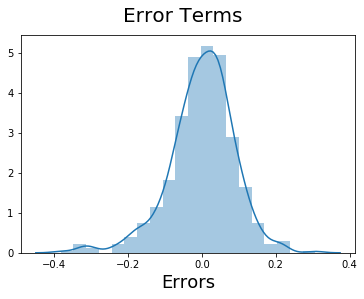

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

####  Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

## Prediction and Evaluation

In [68]:
#Scaling the test set
num_vars = ['temp','atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [70]:
#Dividing into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
X_test_rfe = X_test[X_test.columns[rfe.support_]]

In [75]:
# let us remove the dropped colums from X_test_rfe
X_test_new = X_test_rfe.drop(['Saturday','Feb','spring','Dec','Nov'],axis=1)

In [77]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

#### r2

In [81]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test, y_test_pred)
print(r2)

0.8038855774923962


#### Adjusted r2

In [82]:
# We already have the value of R^2 (calculated in above step)
# n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7904267445752077

Text(0, 0.5, 'y_test_pred')

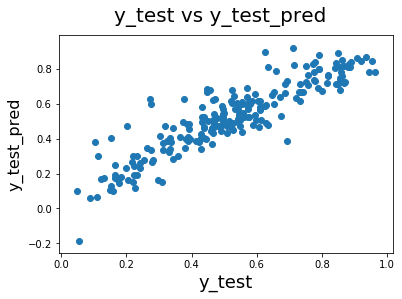

In [84]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16) 


### Final Results

- Train R^2 :0.843
- Train Adjusted R^2 :0.839
- Test R^2 :0.803
- Test Adjusted R^2 :0.791 
#### This seems to be a really good model that can very well 'Generalize' various datasets.



In [87]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.13e-189
Time:                        16:20:37   Log-Likelihood:                 510.33
No. Observations:                 510   AIC:                            -992.7
Df Residuals:                     496   BIC:                            -933.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   


We can see that the equation of our best fitted line is:
- cnt= 0.2215 + 0.2289*yr + 0.5703*temp - 0.1708*hum -0.1935*windspeed + 0.0751*summer + 0.1267*winter + 0.0937*sept -0.2385*LightSnow-lightRain-Thunderstorm- 0.0543*Mist-Cloudy - 0.0379*Jan - 0.0473*Jul

